In [22]:
import pandas as pd
import os, json
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
import requests as r
pd.options.display.max_columns = None
pd.set_option('max_colwidth', 40)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ipywidgets import *
import seaborn as sns
import shapefile as shp
import geopandas as gpd
from matplotlib.font_manager import FontProperties
from IPython.display import display

In [3]:
fao_stats = pd.read_csv('Data/FAOSTAT_data_2-22-2021.csv')
fao_stats = fao_stats[fao_stats['Value'] > 50000]
fao_stats = fao_stats.sort_values('Value')
olives = fao_stats[fao_stats['Item']=='Olives']
fao_stats.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
20,QC,Crops,143,Morocco,5510,Production,393,Cauliflowers and broccoli,2019,2019,tonnes,50762.0,NaN,Official data
6,QC,Crops,143,Morocco,5510,Production,572,Avocados,2019,2019,tonnes,54576.0,NaN,Official data
27,QC,Crops,143,Morocco,5510,Production,397,Cucumbers and gherkins,2019,2019,tonnes,57448.0,NaN,Official data
33,QC,Crops,143,Morocco,5510,Production,619,"Fruit, fresh nes",2019,2019,tonnes,59091.0,Im,FAO data based on imputation methodo...
74,QC,Crops,143,Morocco,5510,Production,27,"Rice, paddy",2019,2019,tonnes,64598.0,NaN,Official data


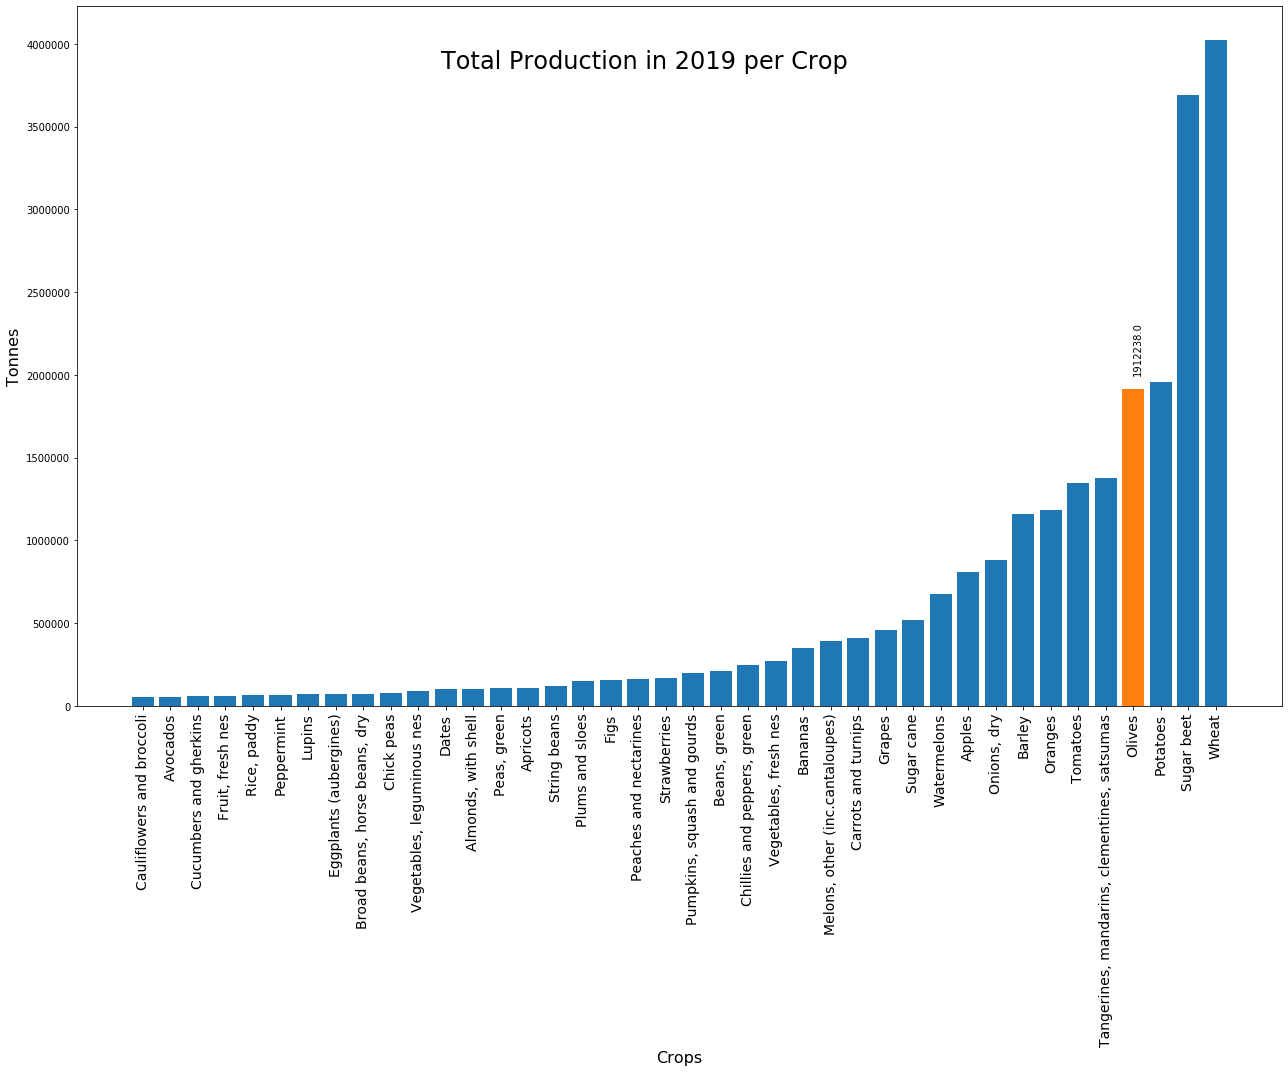

In [4]:
plt.figure(figsize=(18,15))
plt.bar(fao_stats['Item'], fao_stats['Value'])
plt.bar(olives['Item'], olives['Value'])
plt.text(olives['Item'], olives['Value'] + 100000, str([i for i in olives['Value']][0]), rotation=90)
plt.xticks(rotation=90, size=14)
plt.xlabel('Crops', size=16)
plt.ylabel('Tonnes', size=16)
plt.suptitle('Total Production in 2019 per Crop',size=24, y=.95)
plt.tight_layout()
# plt.savefig('Ag_Production_Morocco.png', dpi=100)

In [5]:
crop_types = pd.read_csv('Data/FAOSTAT_data_2-23-2021 (1).csv')
oilcrops = crop_types[crop_types['Item'] == 'Oilcrops']
crop_types.head()

,Domain Code,Domain,Element Code,Element,Item Code,Item,Unit,Value,Flag,Flag Description
0,QC,Crops,5510,Production,1738,Fruit Primary,tonnes,6381574,A,"Aggregate, may include official, sem..."
1,QC,Crops,5510,Production,1717,"Cereals, Total",tonnes,5312976,A,"Aggregate, may include official, sem..."
2,QC,Crops,5510,Production,1723,Sugar Crops Primary,tonnes,4211840,A,"Aggregate, may include official, sem..."
3,QC,Crops,5510,Production,1735,Vegetables Primary,tonnes,4205557,A,"Aggregate, may include official, sem..."
4,QC,Crops,5510,Production,15,Wheat,tonnes,4025303,A,"Aggregate, may include official, sem..."


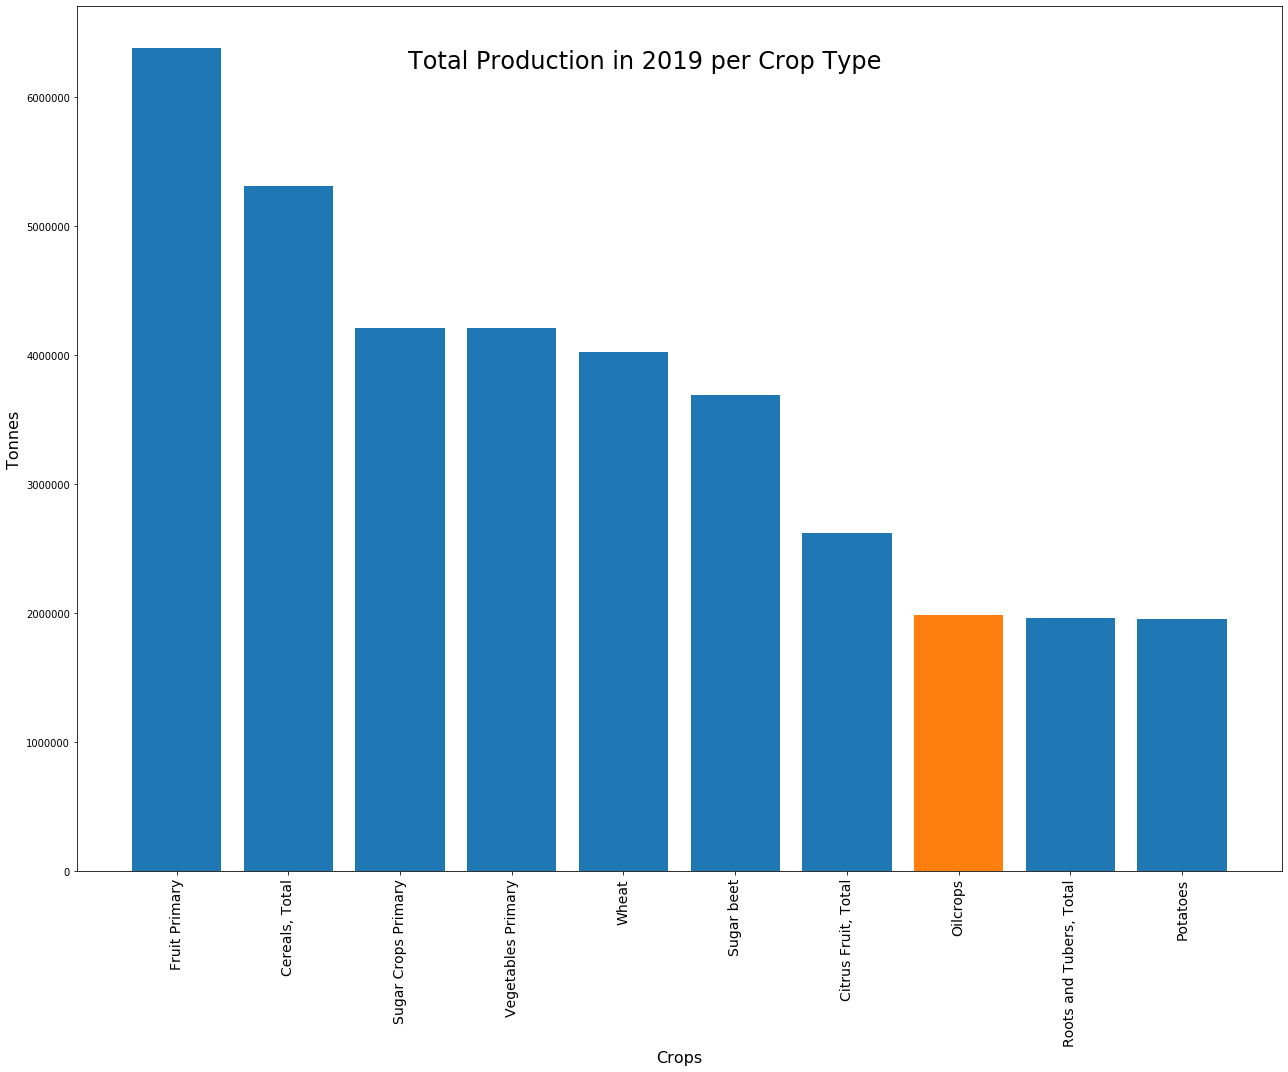

In [180]:
plt.figure(figsize=(18,15))
plt.bar('Item', 'Value', data=crop_types)
plt.bar('Item', 'Value', data=oilcrops)
# plt.text(olives['Item'], olives['Value'] + 100000, str([i for i in olives['Value']][0]), rotation=90)
plt.xticks(rotation=90, size=14)
plt.xlabel('Crops', size=16)
plt.ylabel('Tonnes', size=16)
plt.suptitle('Total Production in 2019 per Crop Type',size=24, y=.95)
plt.tight_layout()

In [6]:
olive_prod = pd.read_csv('Data/FAOSTAT_data_2-23-2021.csv')
olive_prod.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,143,Morocco,5312,Area harvested,260,Olives,1994,1994,ha,430000,NaN,Official data
1,QC,Crops,143,Morocco,5312,Area harvested,260,Olives,1995,1995,ha,415200,NaN,Official data
2,QC,Crops,143,Morocco,5312,Area harvested,260,Olives,1996,1996,ha,418800,NaN,Official data
3,QC,Crops,143,Morocco,5312,Area harvested,260,Olives,1997,1997,ha,426600,NaN,Official data
4,QC,Crops,143,Morocco,5312,Area harvested,260,Olives,1998,1998,ha,520000,NaN,Official data


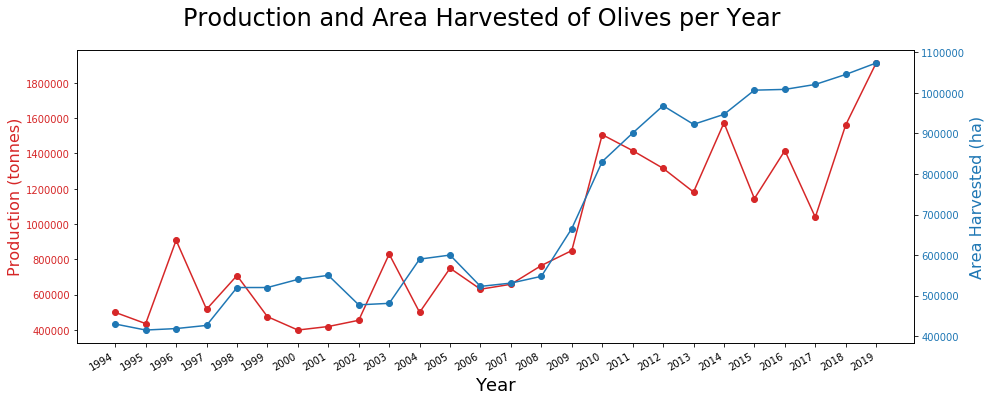

In [7]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:red'
ax1.set_xlabel('Year', size=18)
ax1.set_xticks(olive_prod[olive_prod['Element'] == 'Production']['Year'])
ax1.set_ylabel("Production (tonnes)", color=color, size=16)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(olive_prod[olive_prod['Element'] == 'Production']['Year'], olive_prod[olive_prod['Element'] == 'Production']['Value'], 'o-', color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Area Harvested (ha)', color=color,  size=16)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(olive_prod[olive_prod['Element'] == 'Area harvested']['Year'], olive_prod[olive_prod['Element'] == 'Area harvested']['Value'], 'o-', color=color)
fig.autofmt_xdate()
plt.suptitle('Production and Area Harvested of Olives per Year', size=24)
# plt.savefig('Olive_production_year.png', dpi=100)
plt.show()

In [8]:
shp_path = "Shapes/mar_adm_unhcr2020_shp/mar_admbnda_adm1_unhcr_20201203.shp"
sf = gpd.read_file(shp_path)
sf.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,9.283334,2.652551,Beni Mellal Khenifra,بني ملال - خنيفرة,MA001,None,None,None,None,None,Morocco,المغرب,MA,2020-04-30,2020-12-03,None,"POLYGON ((-6.32180 33.46973, -6.3152..."
1,8.897482,1.958500,Casablanca Settat,الدار البيضاء - سطات,MA002,None,None,None,None,None,Morocco,المغرب,MA,2020-04-30,2020-12-03,None,"POLYGON ((-7.12602 33.83176, -7.1108..."
2,18.187532,8.149639,Draa Tafilalet,درعة - تافيلالت,MA003,None,None,None,None,None,Morocco,المغرب,MA,2020-04-30,2020-12-03,None,"POLYGON ((-4.82774 33.09795, -4.8214..."
3,13.475069,3.781542,Fez Meknes,فاس - مكناس,MA004,None,None,None,None,None,Morocco,المغرب,MA,2020-04-30,2020-12-03,None,"POLYGON ((-3.81626 34.88507, -3.7923..."
4,10.040101,3.757872,Guelmim Oued Noun,كلميم - واد نون,MA005,None,None,None,None,None,Morocco,المغرب,MA,2020-04-30,2020-12-03,None,"POLYGON ((-10.00378 29.62532, -10.00..."


In [9]:
regional_prod = pd.read_csv('Data/Regional_Dist_Olive.csv')
regional_prod
    

,Region,Rainfed area (ha),Irrigated area (ha),Total (ha)
0,Fez Meknes,299911.0,46375,346286
1,Marrakech Safi,47151.0,16795,215102
2,Tangier Tetouan Al Hoceima,160432.0,2306,162737
3,Oriental,55598.0,67005,122603
4,Beni Mellal Khenifra,33281.0,46796,80077
5,Rabat Sale Kenitra,56727.0,9408,66135
6,Souss Massa,2506.0,1695,19455
7,Draa Tafilalet,1546.0,14262,15808
8,Casablanca Settat,3506.0,11319,14826
9,Guelmim Oued Noun,NaN,2157,2157


In [10]:
merged = sf.set_index('ADM1_EN').join(regional_prod.set_index('Region'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged.head()

,ADM1_EN,Shape_Leng,Shape_Area,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry,Rainfed area (ha),Irrigated area (ha),Total (ha)
0,Beni Mellal Khenifra,9.283334,2.652551,بني ملال - خنيفرة,MA001,0,0,0,0,0,Morocco,المغرب,MA,2020-04-30,2020-12-03,0,"POLYGON ((-6.32180 33.46973, -6.3152...",33281.0,46796,80077
1,Casablanca Settat,8.897482,1.958500,الدار البيضاء - سطات,MA002,0,0,0,0,0,Morocco,المغرب,MA,2020-04-30,2020-12-03,0,"POLYGON ((-7.12602 33.83176, -7.1108...",3506.0,11319,14826
2,Draa Tafilalet,18.187532,8.149639,درعة - تافيلالت,MA003,0,0,0,0,0,Morocco,المغرب,MA,2020-04-30,2020-12-03,0,"POLYGON ((-4.82774 33.09795, -4.8214...",1546.0,14262,15808
3,Fez Meknes,13.475069,3.781542,فاس - مكناس,MA004,0,0,0,0,0,Morocco,المغرب,MA,2020-04-30,2020-12-03,0,"POLYGON ((-3.81626 34.88507, -3.7923...",299911.0,46375,346286
4,Guelmim Oued Noun,10.040101,3.757872,كلميم - واد نون,MA005,0,0,0,0,0,Morocco,المغرب,MA,2020-04-30,2020-12-03,0,"POLYGON ((-10.00378 29.62532, -10.00...",0.0,2157,2157


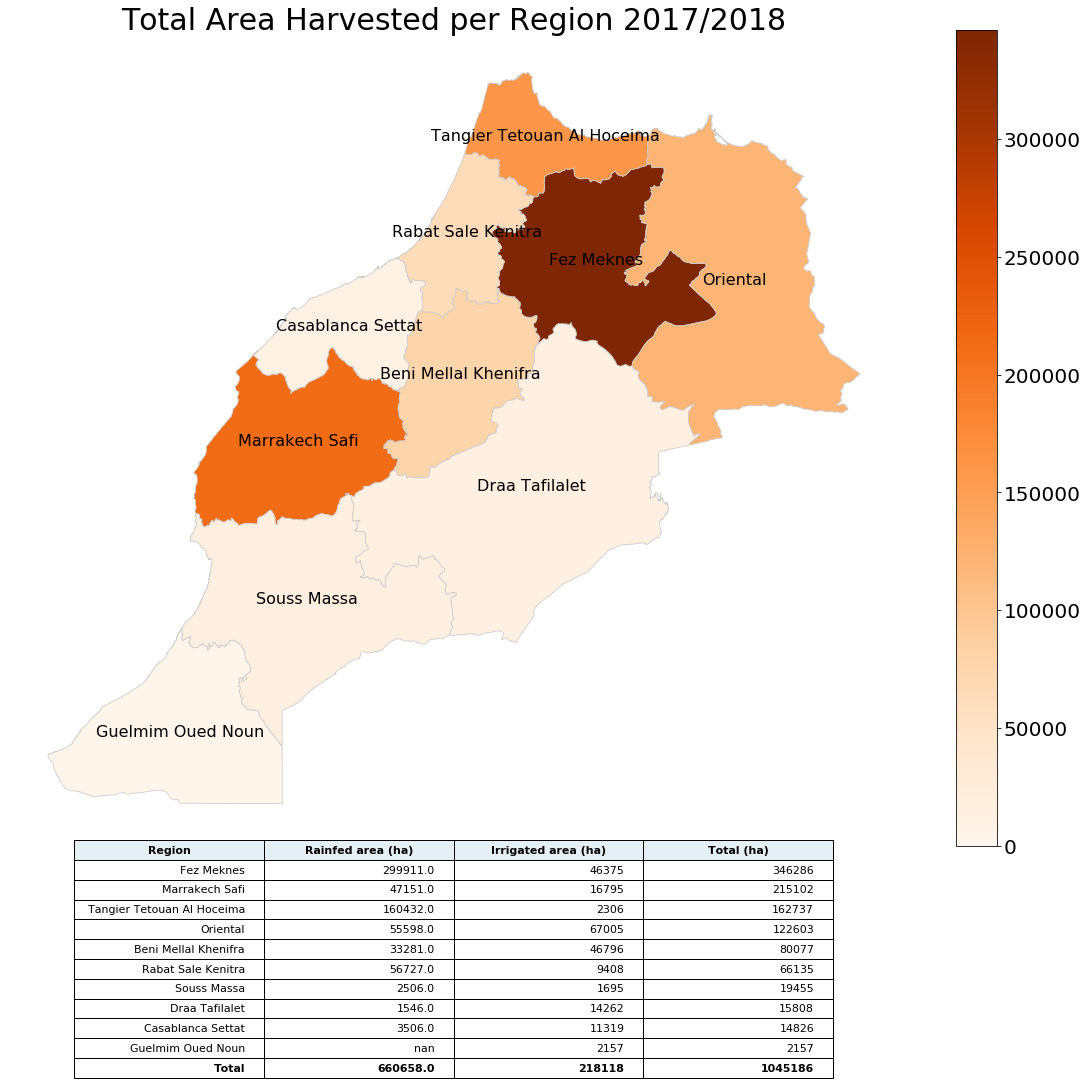

In [11]:
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.axis('off')
ax.set_title('Total Area Harvested per Region 2017/2018', 
             fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, merged['Total (ha)'].max()
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('Total (ha)', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    plt.annotate(s=row['ADM1_EN'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), 
                 horizontalalignment='center', fontsize=16, color='black', wrap=True)
cell_text = []
for row in range(len(regional_prod)):
    cell_text.append(regional_prod.iloc[row])
cell_text.append(['Total', merged['Rainfed area (ha)'].sum(), merged['Irrigated area (ha)'].sum(),
                  merged['Total (ha)'].sum()])
ccolors = plt.cm.BuPu(np.full(len(regional_prod.columns), 0.1))
table = plt.table(cellText=cell_text, colLabels=regional_prod.columns, colColours=ccolors, loc='bottom')
for (row, col), cell in table.get_celld().items():
    if (row == 0):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    if row == len(merged['ADM1_EN']) + 1:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
table.scale(0.85, 1.65)
table.set_fontsize(24)
# plt.savefig('Total_Area_Harvested_Regions.png', dpi=300, bbox_inches='tight')

In [55]:
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2014001_aid0001.tif') as src:
    a = src.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2015001_aid0001.tif') as src:
    b = src.read()


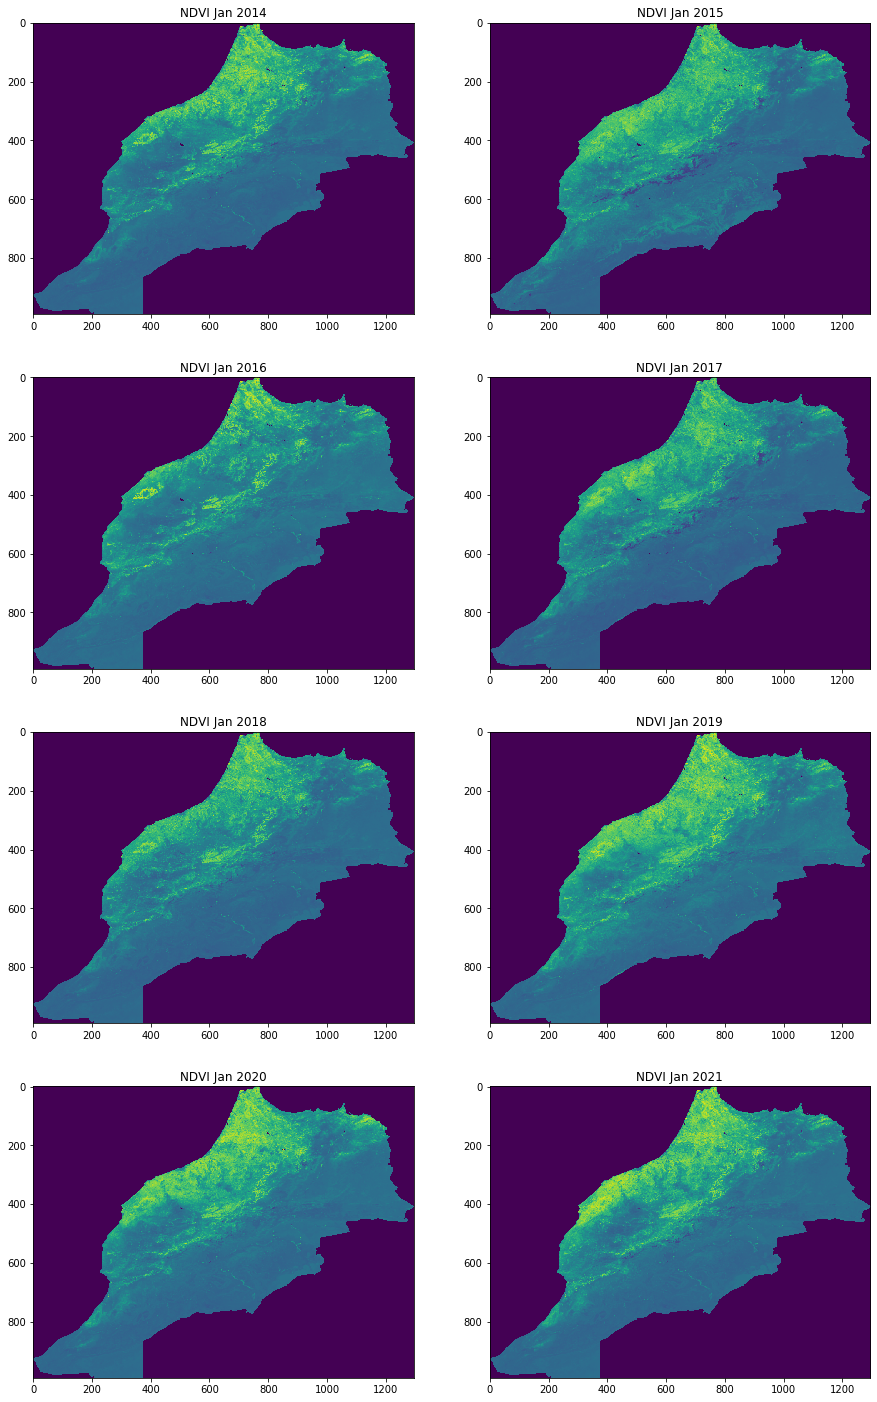

In [44]:
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2014001_aid0001.tif') as j14:
    j14 = j14.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2015001_aid0001.tif') as j15:
    j15 = j15.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2016001_aid0001.tif') as j16:
    j16 = j16.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2017001_aid0001.tif') as j17:
    j17 = j17.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2018001_aid0001.tif') as j18:
    j18 = j18.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2019001_aid0001.tif') as j19:
    j19 = j19.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2020001_aid0001.tif') as j20:
    j20 = j20.read()
with rio.open('Data/Morocco NDVI/MYD13A3.006__1_km_monthly_NDVI_doy2021001_aid0001.tif') as j21:
    j21 = j21.read()
yr = [j14, j15, j16, j17, j18, j19, j20, j21]
fig, axs = plt.subplots(4,2,figsize = (15, 25))
# print(axs)
axs = axs.ravel()

for i in zip(range(8), yr, range(2014, 2022)):
    axs[i[0]].imshow(i[1].squeeze())
    axs[i[0]].set_title('NDVI Jan ' + str(i[2]))
ep.colorbar(im)
ax.set_axis_off()
plt.savefig('NDVI_JAN_14-21.png', dpi=100)
plt.show()